In [1]:
#| default_exp core

In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
from IPython.display import SVG


train_df = pd.read_csv('/kaggle/input/drawing-with-llms/train.csv', index_col = 'id')
questions_df = pd.read_parquet('/kaggle/input/drawing-with-llms/questions.parquet')
questions_df.set_index('id', inplace=True)

# display(train_df.head(2))
# display(questions_df.head(2))


In [3]:
#| export

class Model:
    def __init__(self):
        pass

    def predict(self, prompt: str) -> str:
        return """<svg width="210" height="210" xmlns="http://www.w3.org/2000/svg">
<rect x="44" y="57" width="23" height="38" fill="yellow" transform="rotate(215, 55.5, 76.0)" />
<circle cx="155" cy="115" r="15" fill="pink" />
<ellipse cx="188" cy="65" rx="18" ry="46" fill="cyan" transform="rotate(261, 188, 65)" />
<polygon points="120,197 189,31 16,133" fill="red" />
</svg>"""

In [4]:
import kaggle_evaluation

kaggle_evaluation.test(Model)

Creating Model instance...
Running inference tests...
Wrote test submission file to "/tmp/kaggle-evaluation-submission-0c2tcnr2.csv".
Success!


## Evaluate

In [5]:
model = Model()

In [6]:
# https://www.kaggle.com/code/jiazhuang/svg-image-fidelity
metric = kagglehub.package_import('jiazhuang/svg-image-fidelity')

Installing python dependencies for Package 'kagglehub_package_jiazhuang_svg_image_fidelity_12', logging progress to '/tmp/kagglehub-package-dependencies-install-fx7hgkx_.txt'.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

a purple forest at dusk


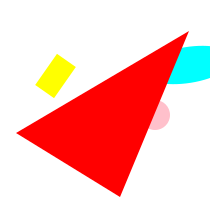

The 'batch_size' argument of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'max_batch_size' argument instead.
The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


{'competition_score': 0.18562136133915144, 'vqa_score': 0.16261265934263633, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
gray wool coat with a faux fur collar


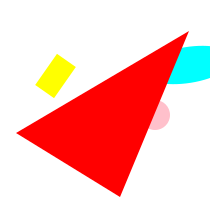

{'competition_score': 0.6466868678402216, 'vqa_score': 0.7416343879959296, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a lighthouse overlooking the ocean


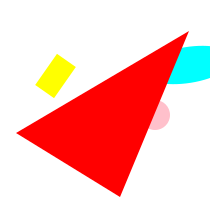

{'competition_score': 0.7398025024864402, 'vqa_score': 0.9049084902782192, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
burgundy corduroy pants with patch pockets and silver buttons


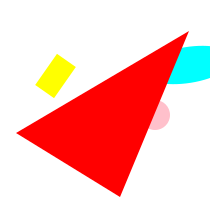

{'competition_score': 0.23373789344745477, 'vqa_score': 0.209937846920155, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
orange corduroy overalls


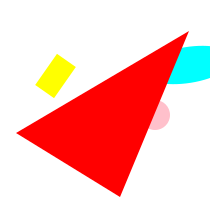

{'competition_score': 0.16132640866152934, 'vqa_score': 0.1395924652759487, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a purple silk scarf with tassel trim


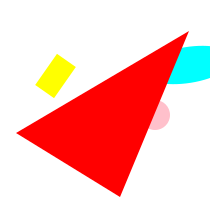

{'competition_score': 0.1497517669266549, 'vqa_score': 0.1288229680841777, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a green lagoon under a cloudy sky


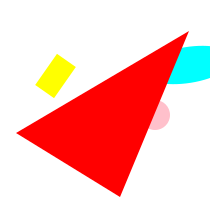

{'competition_score': 0.4384347388818538, 'vqa_score': 0.4412098007158032, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
crimson rectangles forming a chaotic grid


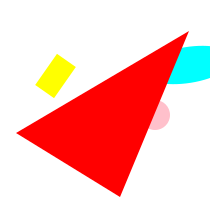

{'competition_score': 0.5121801257691107, 'vqa_score': 0.5387955339031869, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
purple pyramids spiraling around a bronze cone


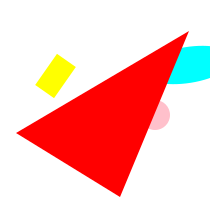

{'competition_score': 0.21980423325265436, 'vqa_score': 0.19598917457656512, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
magenta trapezoids layered on a transluscent silver sheet


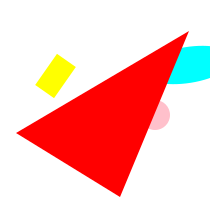

{'competition_score': 0.19116689059766223, 'vqa_score': 0.16794773887170047, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a snowy plain


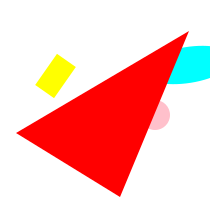

{'competition_score': 0.47296496864348814, 'vqa_score': 0.4858270047079266, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
black and white checkered pants


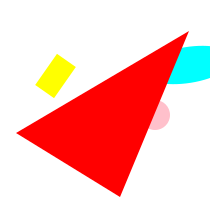

{'competition_score': 0.41304429259854897, 'vqa_score': 0.4095416982070862, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a starlit night over snow-covered peaks


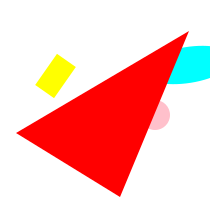

{'competition_score': 0.7554881037996941, 'vqa_score': 0.9345764199778798, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
khaki triangles and azure crescents


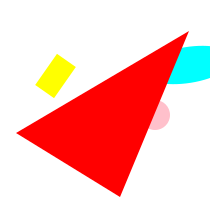

{'competition_score': 0.40301003918791506, 'vqa_score': 0.3972820048363151, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----
a maroon dodecahedron interwoven with teal threads


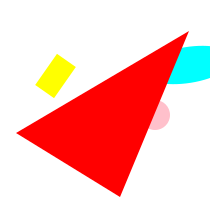

{'competition_score': 0.2863085144714524, 'vqa_score': 0.2644548551469633, 'ocr_score': 1.0, 'aesthetic_score': 0.4276750087738037}
-----


,competition_score,vqa_score,ocr_score,aesthetic_score
count,15.000000,15.000000,15.0,15.000000
mean,0.387289,0.408209,1.0,0.427675
std,0.207370,0.271570,0.0,0.000000
min,0.149752,0.128823,1.0,0.427675
25%,0.205486,0.181968,1.0,0.427675
50%,0.403010,0.397282,1.0,0.427675
75%,0.492573,0.512311,1.0,0.427675
max,0.755488,0.934576,1.0,0.427675


In [7]:
# test model on the train dataset 
all_scores = []
for idx, row in train_df.iterrows():
    img_description = row['description']
    print(img_description)

    svg = model.predict(img_description)
    display(SVG(svg))

    # prepare questions for scoring
    questions = questions_df.loc[idx]
    questions_dict = {
        'question': questions['question'].tolist(),
        'choices': questions['choices'].tolist(),
        'answer': questions['answer'].tolist()
    }

    score = metric.score_instance(questions_dict, svg, random_seed=2)
    print(score)
    print('-----')

    all_scores.append(score)

scores_df = pd.DataFrame(all_scores)
scores_df.describe()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the mar

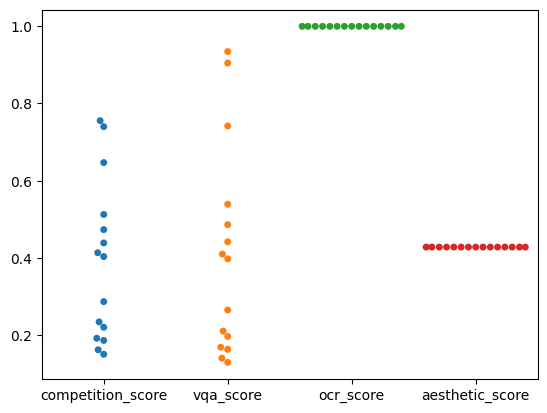

In [8]:
sns.swarmplot(scores_df);

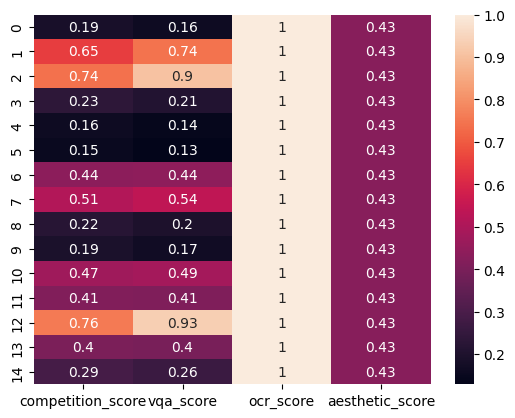

In [9]:
sns.heatmap(scores_df, annot = True);